# TechLab - Trading Algoritmico Pt.3

Import delle librerie necessarie

In [1]:
%matplotlib widget
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
import numpy as np

In [2]:
style.use('ggplot')

Eseguire il seguente codice per ottenere i dati on-line:

In [3]:
#start = dt.datetime(2000,1,1)
#end = dt.datetime(2018,12,31)
#df = web.DataReader('TSLA', 'yahoo', start, end)
#print(df.head())
#df.to_csv('Data/TSLA.csv')

Eseguire il seguente codice per ottenere i dati off-line:

In [4]:
dta = pd.read_csv('Data/TSLA.csv', parse_dates=True)
dta['Date'] = pd.to_datetime(dta['Date'])
dta = dta.drop(['Open','High','Low','Close','Volume'], axis=1)
dta = dta.set_index('Date')
y = pd.Series(dta['Adj Close'], index=dta.index)
giorni = 300
forecast = 30
y = y[(len(y)-giorni-forecast):(len(y)-forecast)]

<IPython.core.display.Javascript object>


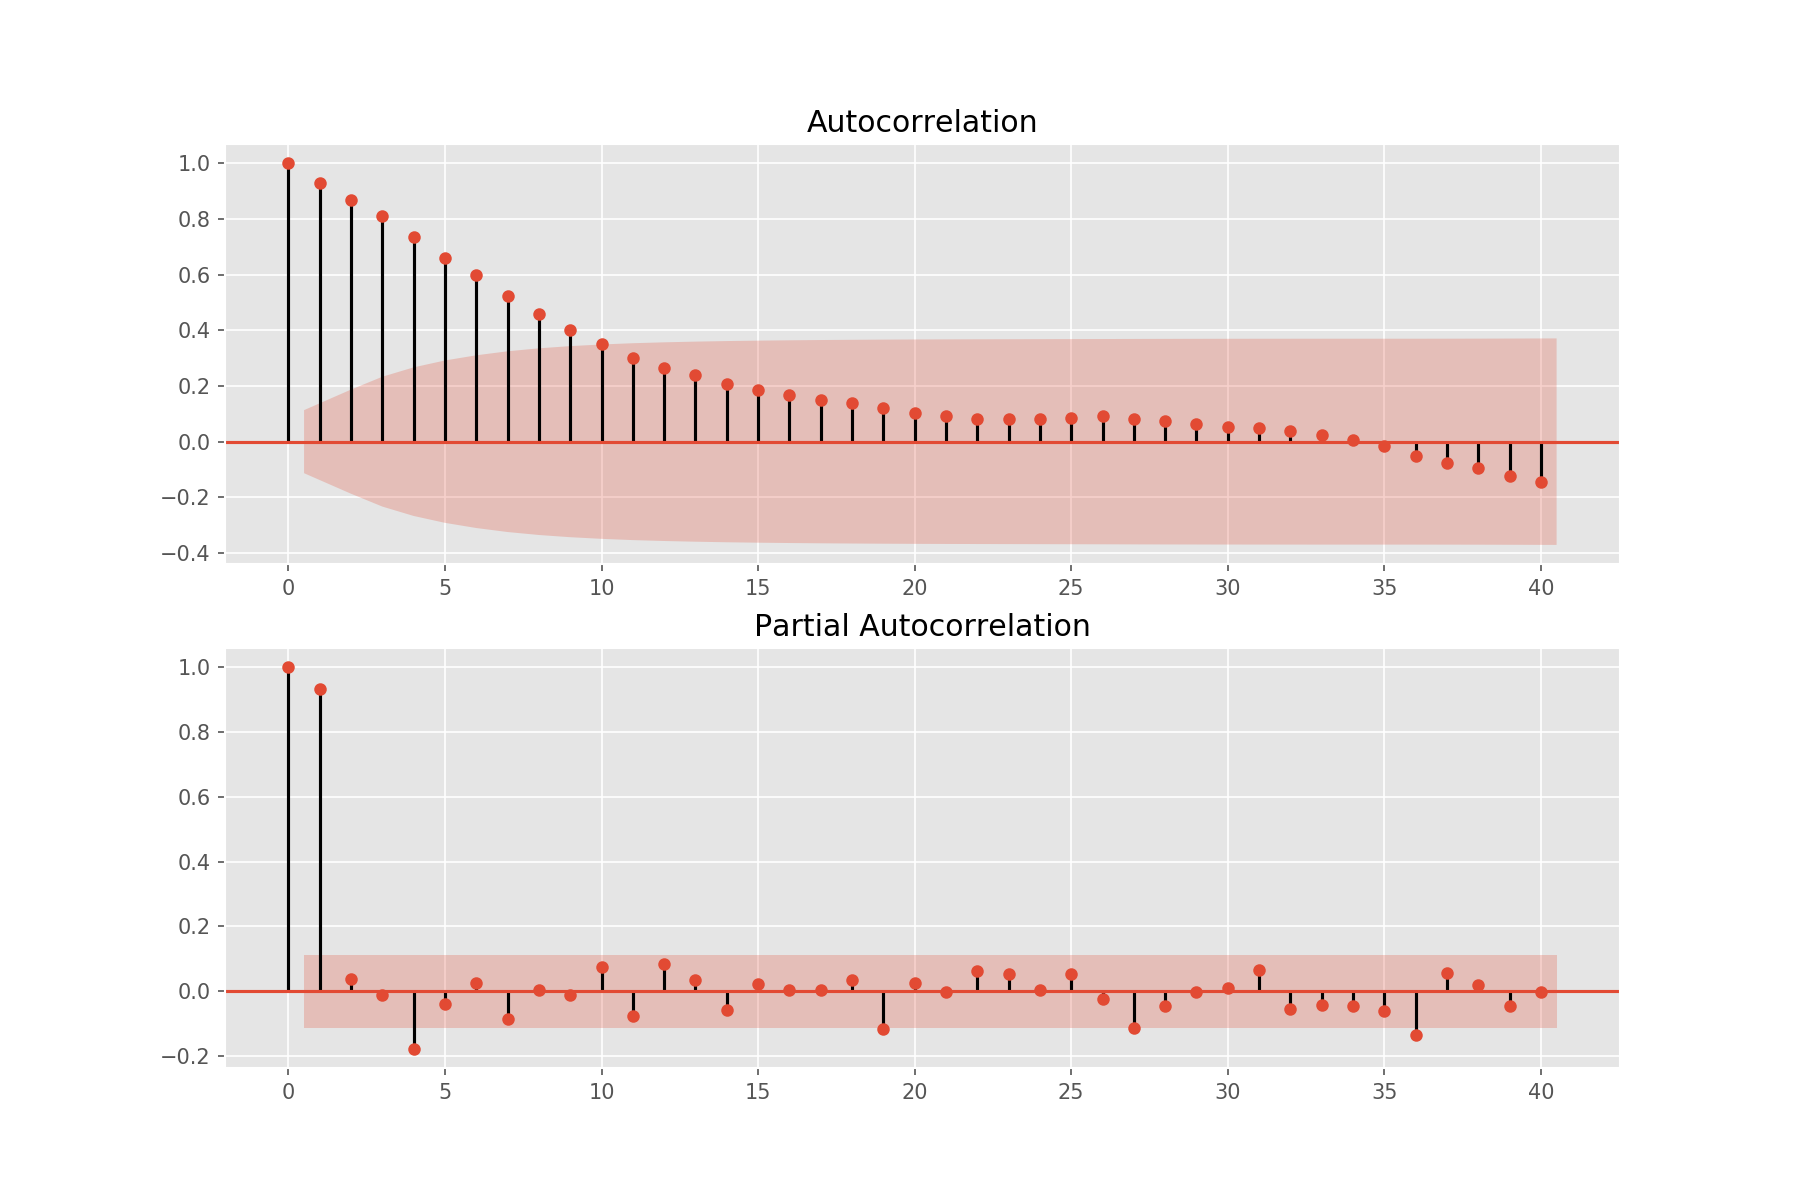

In [5]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax2)

In [6]:
arma_mod = sm.tsa.ARMA(y, order=(2,9), missing='drop')
arma_res = arma_mod.fit()
print(arma_res.summary())
y.head()

/home/techlab/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                  300
Model:                     ARMA(2, 9)   Log Likelihood               -1113.258
Method:                       css-mle   S.D. of innovations              9.857
Date:                dom, 29 set 2019   AIC                           2252.515
Time:                        17:42:24   BIC                           2300.665
Sample:                             0   HQIC                          2271.785
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             319.7187      6.711     47.642      0.000     306.566     332.872
ar.L1.Adj Close     1.2304      0.915      1.345      0.180      -0.563       3.023
ar.L2.Adj Close    -0.3156      

Date
2017-09-08    343.399994
2017-09-11    363.690002
2017-09-12    362.750000
2017-09-13    366.230011
2017-09-14    377.640015
Name: Adj Close, dtype: float64

<IPython.core.display.Javascript object>


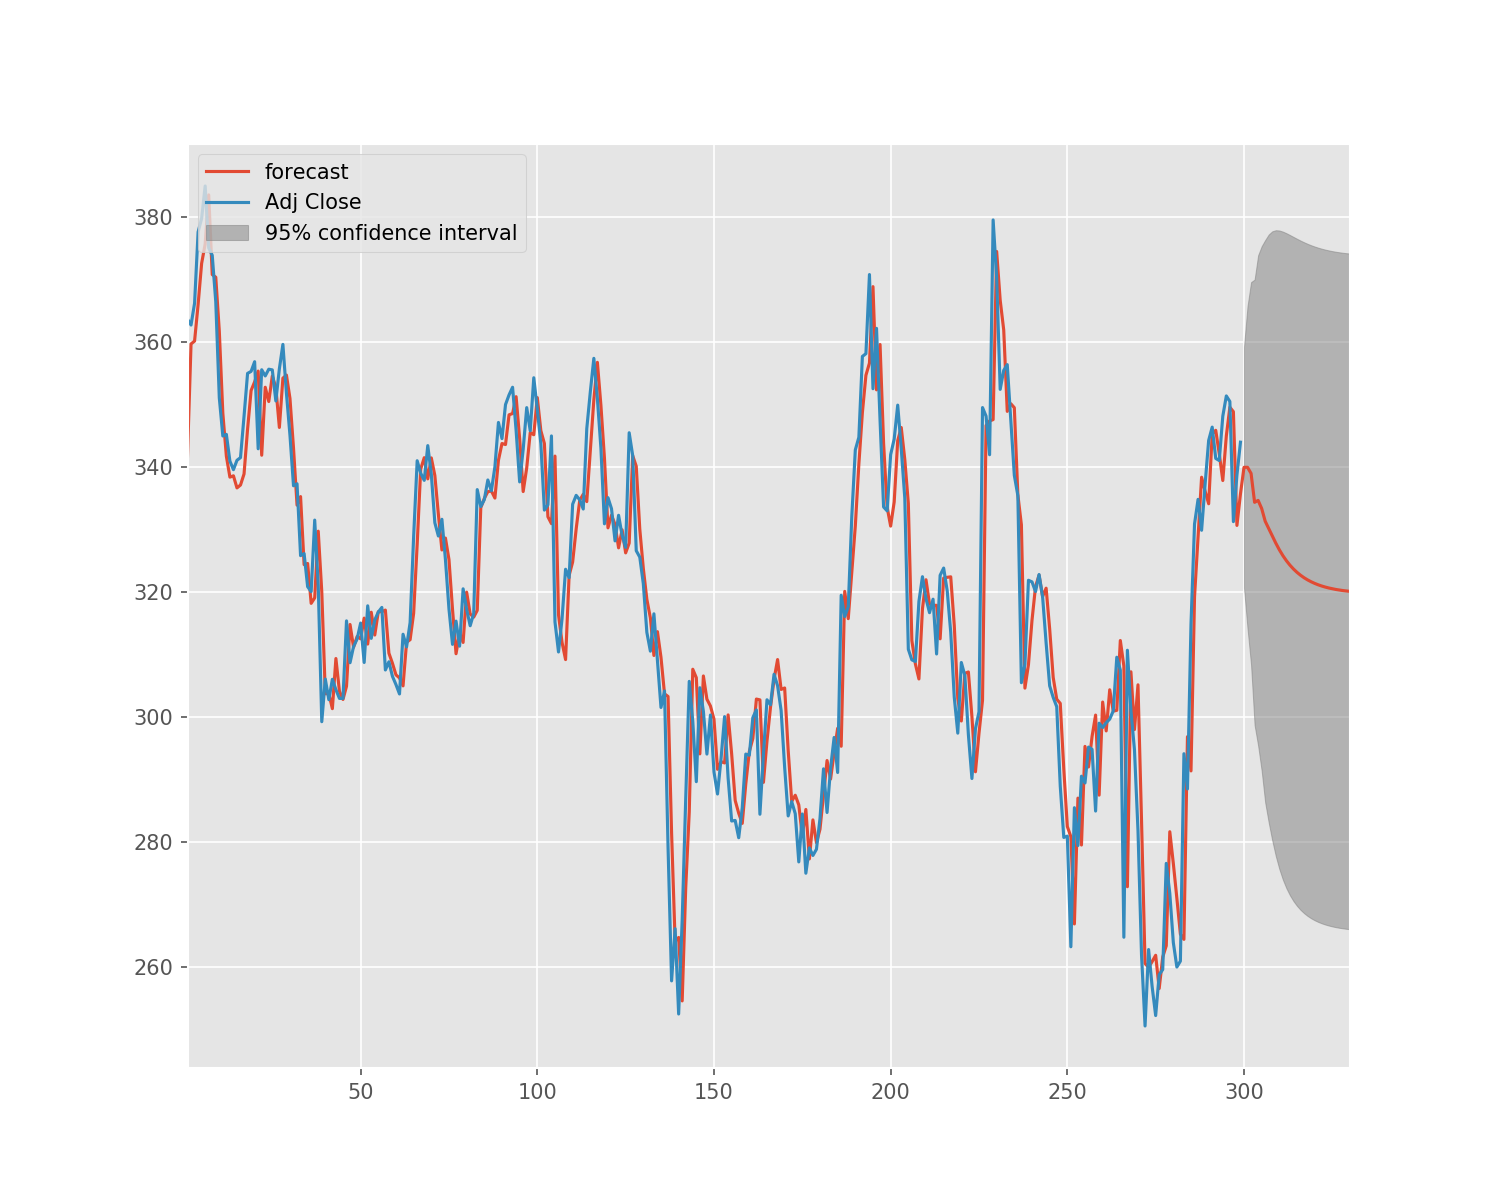

/home/techlab/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/techlab/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [7]:
fig, ax = plt.subplots(figsize=(10,8))
fig = arma_res.plot_predict(start=1, end=giorni+forecast, ax=ax)
legend = ax.legend(loc='upper left')

<IPython.core.display.Javascript object>


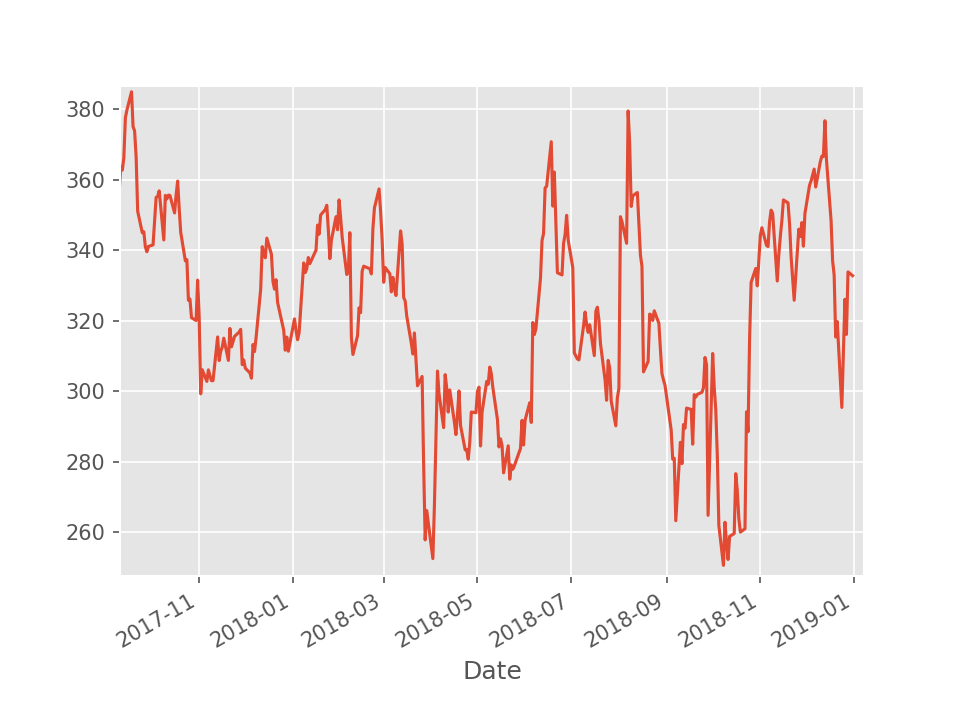

In [8]:
dta['Adj Close'].plot()

Eseguire il seguente codice per ottenere i dati on-line:

In [9]:
#start = dt.datetime(2000,1,1)
#end = dt.datetime(2018,12,31)
#df = web.DataReader('ISP.MI', 'yahoo', start, end)
#print(df.head())
#df.to_csv('Data/ISP.csv')

Eseguire il seguente codice per ottenere i dati off-line:

In [10]:
dta = pd.read_csv('Data/ISP.csv', parse_dates=True)
dta['Date'] = pd.to_datetime(dta['Date'])
dta = dta.drop(['Open','High','Low','Close','Volume'], axis=1)
dta = dta.set_index('Date')
y = pd.Series(dta['Adj Close'], index=dta.index)
giorni = 300
forecast = 30
y = y[(len(y)-giorni-forecast-870):(len(y)-forecast-870)]

<IPython.core.display.Javascript object>


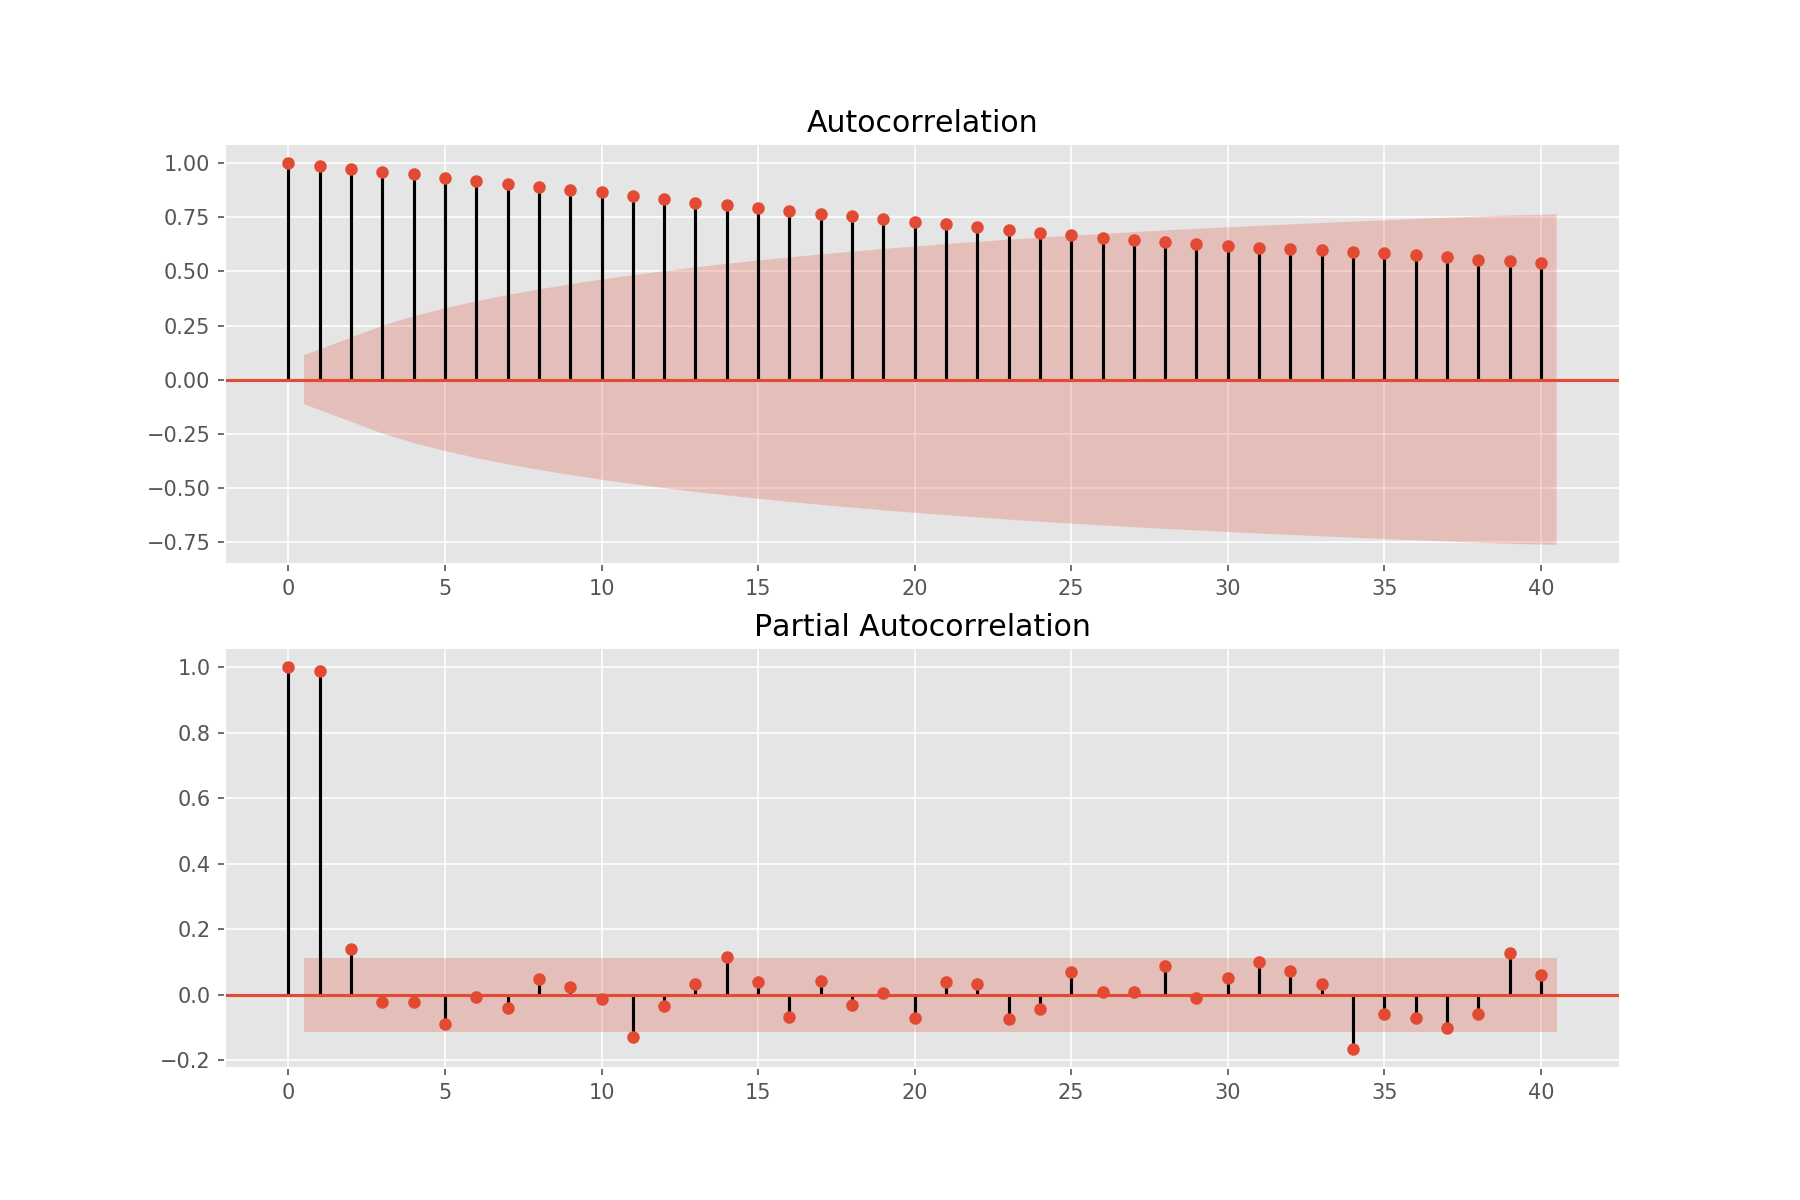

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax2)

In [12]:
arma_mod = sm.tsa.ARMA(y, order=(3,10), missing='drop')
arma_res = arma_mod.fit()
print(arma_res.summary())
y.head()

/home/techlab/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                  300
Model:                    ARMA(3, 10)   Log Likelihood                 551.765
Method:                       css-mle   S.D. of innovations              0.038
Date:                dom, 29 set 2019   AIC                          -1073.530
Time:                        17:43:48   BIC                          -1017.973
Sample:                             0   HQIC                         -1051.296
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.9714      0.204      9.658      0.000       1.571       2.372
ar.L1.Adj Close     -0.4054      0.227     -1.787      0.075      -0.850       0.039
ar.L2.Adj Close      0.6524 

Date
2014-04-09    1.780665
2014-04-10    1.753534
2014-04-11    1.707839
2014-04-14    1.710695
2014-04-15    1.642153
Name: Adj Close, dtype: float64

<IPython.core.display.Javascript object>


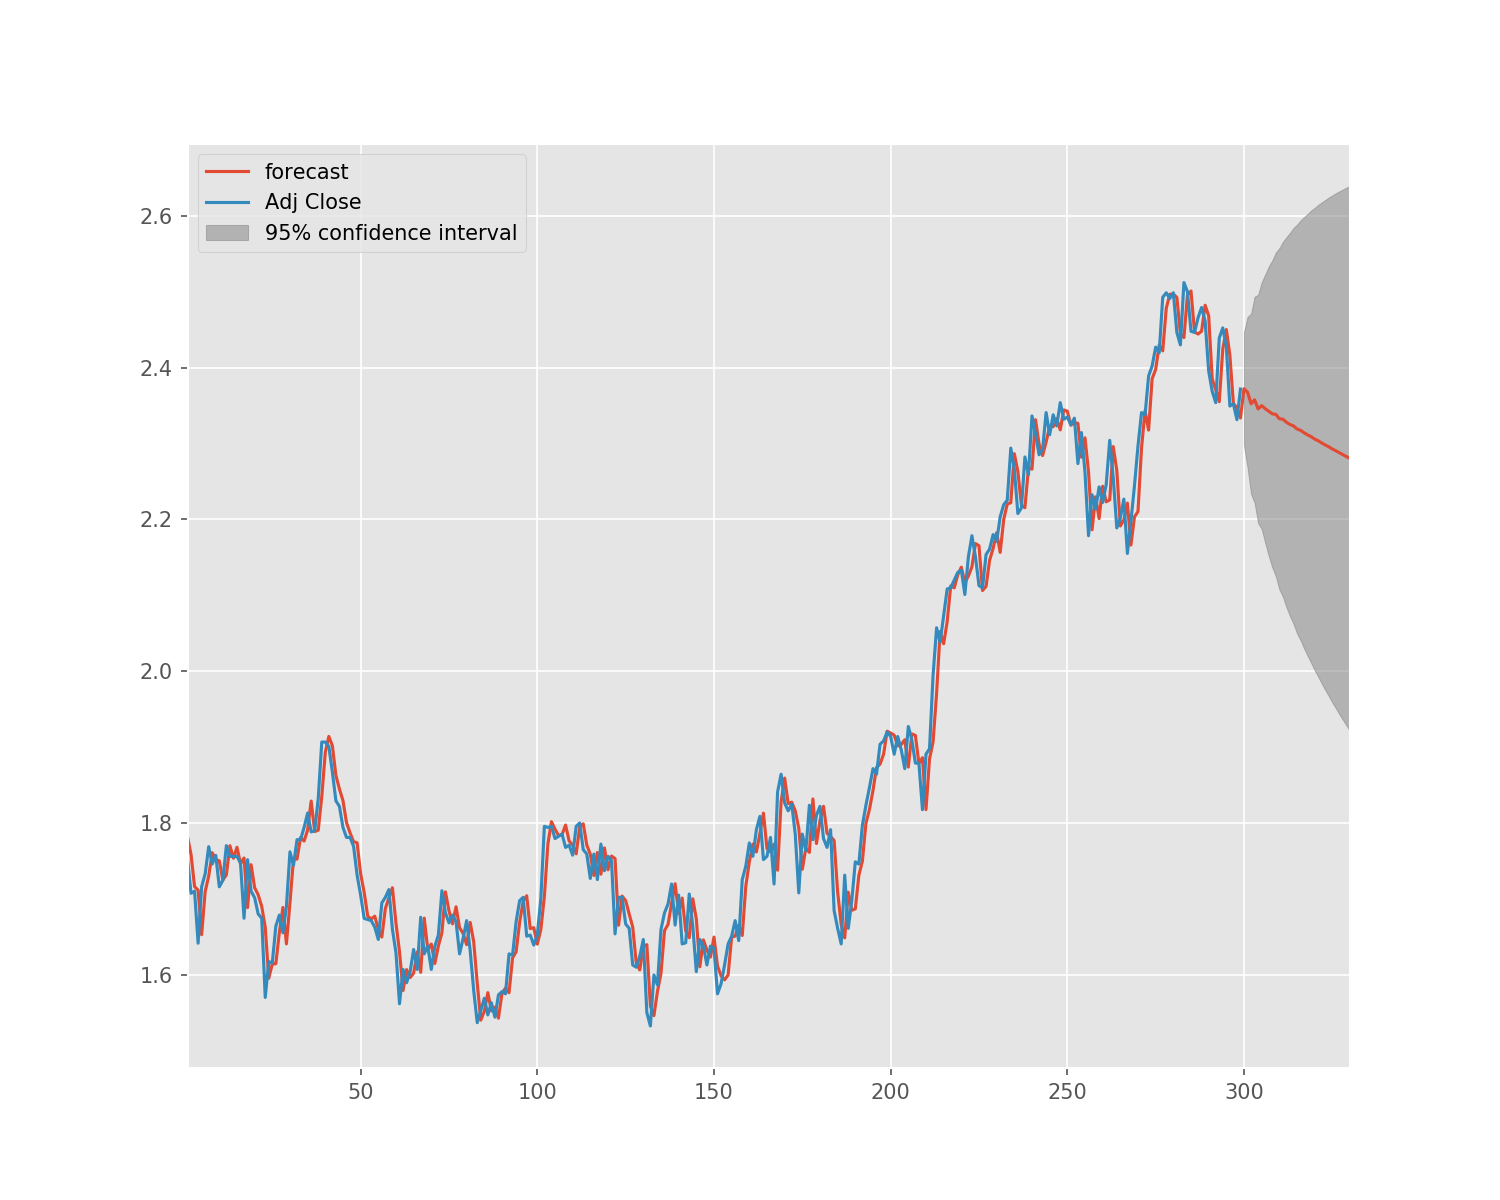

/home/techlab/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/techlab/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [13]:
fig, ax = plt.subplots(figsize=(10,8))
fig = arma_res.plot_predict(start=1, end=giorni+forecast, ax=ax)
legend = ax.legend(loc='upper left')

<IPython.core.display.Javascript object>


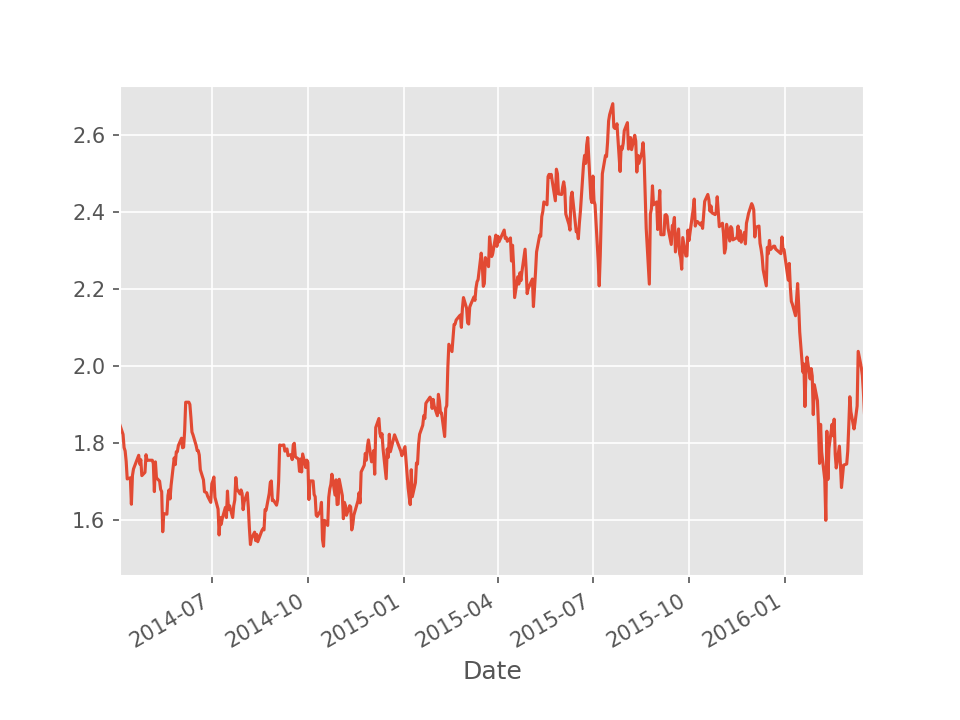

In [14]:
dta['Adj Close'].plot()